<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/INDIAN_LIVER_PATIENTS_DATA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [36]:
data= pd.read_csv('ilpd.csv')

In [37]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
data.shape

(579, 11)

In [38]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [40]:
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
data.loc[:,'Gender'] = le.transform(data['Gender'])

In [41]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [42]:
#Remove rows with missing values:--
data = data.dropna(how = 'any', axis = 0)

In [43]:
data['Dataset'] = data['Dataset'].map({2:0, 1:1})

In [44]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [45]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [46]:
#FEATURE SCALING

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Dataset'], random_state = 0)

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [50]:
#EDA

In [51]:
print("Positive records:", data['Dataset'].value_counts().iloc[0])
print("Negative records:", data['Dataset'].value_counts().iloc[1])

Positive records: 414
Negative records: 165


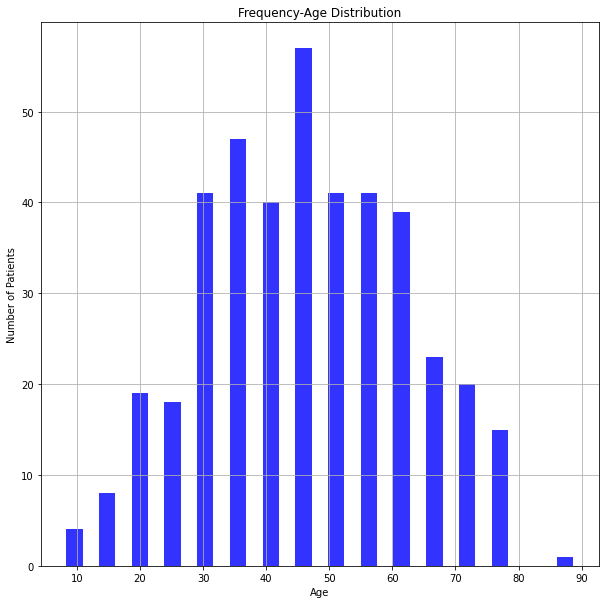

In [52]:
plt.figure(figsize=(10, 10))
plt.hist(data[data['Dataset'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

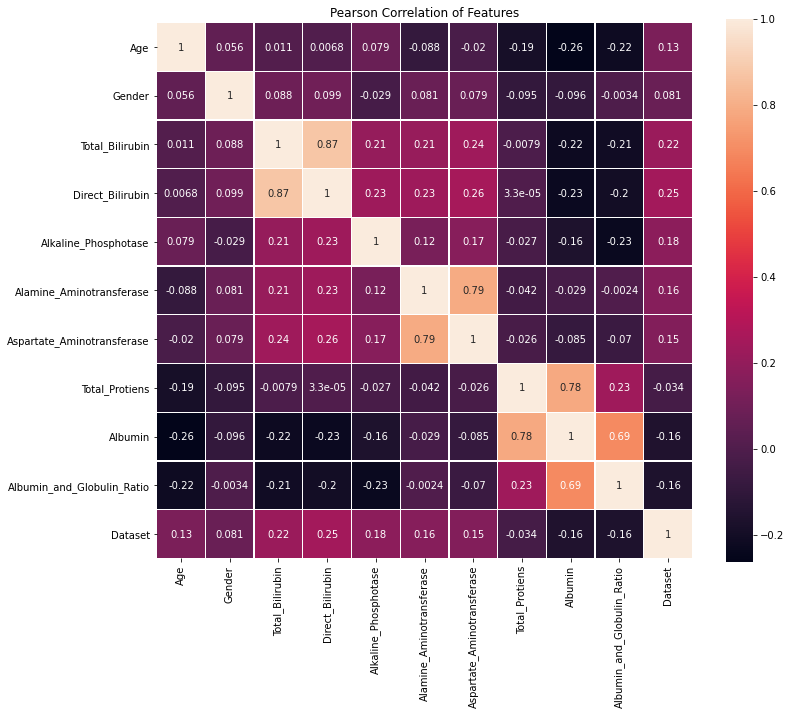

In [53]:
#CORRELATION MATRIX\
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')

# HEATMAP
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()



In [56]:
#normal data
lr = LogisticRegression(C = 0.1).fit(X_train, y_train)
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", lr.score(X_test, y_test))
print("Precision:", precision_score(y_test, lr.predict(X_test)))
print("Recall:", recall_score(y_test, lr.predict(X_test)))
print("F-1 score:", f1_score(y_test, lr.predict(X_test)))


Logistic Regression Classifier on unscaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
#Using feature-scaled data
lr_sc= LogisticRegression(C = 0.1).fit(X_train_sc, y_train)
print("Logistic Regression Classifier on scaled test data:")
print("Accuracy:", lr_sc.score(X_test_sc, y_test))
print("Precision:", precision_score(y_test, lr_sc.predict(X_test_sc)))
print("Recall:", recall_score(y_test, lr_sc.predict(X_test_sc)))
print("F-1 score:", f1_score(y_test, lr_sc.predict(X_test_sc)))


Logistic Regression Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [59]:
svc_clf = SVC(C = 0.1, kernel = 'rbf').fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", svc_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc_clf.predict(X_test)))
print("Recall:", recall_score(y_test, svc_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc_clf.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 0.7172413793103448
Precision: 0.7172413793103448
Recall: 1.0
F-1 score: 0.8353413654618473


In [61]:
svc_clf_sc = SVC(C = 0.1, kernel = 'rbf').fit(X_train_sc, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_sc.score(X_test_sc, y_test))
print("Precision:", precision_score(y_test, svc_clf_sc.predict(X_test_sc)))
print("Recall:", recall_score(y_test, svc_clf_sc.predict(X_test_sc)))
print("F-1 score:", f1_score(y_test, svc_clf_sc.predict(X_test_sc)))

SVM Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [62]:
rfc = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", rfc.score(X_test, y_test))
print("Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Recall:", recall_score(y_test, rfc.predict(X_test)))
print("F-1 score:", f1_score(y_test, rfc.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [63]:
rfc_sc = RandomForestClassifier(n_estimators = 20)
rfc_sc.fit(X_train_sc, y_train)
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", rfc_sc.score(X_test_sc, y_test))
print("Precision:", precision_score(y_test, rfc_sc.predict(X_test_sc)))
print("Recall:", recall_score(y_test, rfc_sc.predict(X_test_sc)))
print("F-1 score:", f1_score(y_test, rfc_sc.predict(X_test_sc)))

Random Forest Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [66]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)
print("k-NN Classifier on unscaled test data:")
print("Accuracy:", knn.score(X_test, y_test))
print("Precision:", precision_score(y_test, knn.predict(X_test)))
print("Recall:", recall_score(y_test, knn.predict(X_test)))
print("F-1 score:", f1_score(y_test, knn.predict(X_test)))


k-NN Classifier on unscaled test data:
Accuracy: 0.6827586206896552
Precision: 0.75
Recall: 0.8365384615384616
F-1 score: 0.7909090909090908


In [67]:
knn_sc = KNeighborsClassifier(n_neighbors = 5)
knn_sc.fit(X_train_sc, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", knn_sc.score(X_test_sc, y_test))
print("Precision:", precision_score(y_test, knn_sc.predict(X_test_sc)))
print("Recall:", recall_score(y_test, knn_sc.predict(X_test_sc)))
print("F-1 score:", f1_score(y_test, knn_sc.predict(X_test_sc)))

SVM Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
